In [6]:
import copy as cp
from sparta.Auxil.PeriodicityDetector import PeriodicityDetector
from sparta.UNICOR.Spectrum import Spectrum
from sparta.UNICOR.Template import Template
from sparta.Auxil.TimeSeries import TimeSeries
from sparta.Observations import Observations
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

In [71]:
# DATA PARAMETERS

survey = "HERMES" # survey name
sample_rate = 1 # sample rate of the data
min_wv = 3800 # minimum wavelength of the data
max_wv = 9000 # maximum wavelength of the data
spec_dir = r"C:\Users\kentb\Desktop\PDM\data\Hermes\delCep_Hermes_spectra" # directory of the spectrum
obs_data = Observations(survey=survey, sample_rate=sample_rate, min_wv=min_wv, max_wv=max_wv,
                        target_visits_lib=spec_dir)
obs_data2 = cp.deepcopy(obs_data)
period_truth = 0.566777

let's goooo
Using target_visits_lib: C:\Users\kentb\Desktop\PDM\data\Hermes\delCep_Hermes_spectra
Selected directory: C:\Users\kentb\Desktop\PDM\data\Hermes\delCep_Hermes_spectra


In [72]:
# Preprocess the spectra
for i in obs_data2.time_series.vals:
    i = i.InterpolateSpectrum()
    i = i.FilterSpectrum(lowcut=20, highcut=0.15, order = 1)
    i = i.ApplyCosineBell(alpha=0.3)


In [73]:
for i in obs_data.time_series.vals:
    i = i.InterpolateSpectrum()

In [13]:
#fold the times and get the new order of the indices

times_folded = [t%period_truth for t in obs_data.time_series.times]
print(obs_data.time_series.times)
print(times_folded)
print(obs_data.time_series.vals)

indices = np.argsort(times_folded).tolist()
obs_data.time_series.times = [obs_data.time_series.times[i] for i in indices]
obs_data.time_series.vals = [obs_data.time_series.vals[i] for i in indices]
print([t%period_truth for t in obs_data.time_series.times])
print(obs_data.time_series.vals)
print(len(obs_data.time_series.vals), len(obs_data.time_series.times),len(times_folded))

[0.39676460018381476, 0.4050660999491811, 0.41220360016450286, 0.4729626001790166, 0.47875049989670515, 0.541953899897635, 0.5477415998466313, 0.5811576000414789, 0.5869452999904752, 0.6312723001465201, 0.6370597002096474, 0.6739559997804463, 0.6794179999269545, 0.6852063001133502, 0.69998349994421, 0.7057713000103831, 1.4556654999032617, 1.4614534000866115, 1.4986777999438345, 1.5044658998958766, 1.5487083001062274, 1.554495899938047, 1.5718740997835994, 1.577662699855864, 1.584994699805975, 1.5936039998196065, 1.5993924997746944, 1.6051803999580443, 1.6109683997929096, 1.616756500210613, 1.6225443999283016, 1.6283324002288282, 1.6341206999495625, 1.6417585001327097, 1.648166200146079, 1.656799899879843, 1.6971766999922693, 1.7330081001855433, 2.423971999902278, 2.4297600998543203, 2.545580899808556, 2.5513685001060367, 2.593747300095856, 2.599535900168121, 2.6521417000330985, 2.65793040022254, 3.447300300002098, 3.4507443998008966, 3.455951299984008, 3.5497162002138793, 3.55550430016

In [20]:
# Initialize plot
fig, ax = plt.subplots()
# print(len(obs_data.time_series.vals[0].wv[0]), len(obs_data.time_series.vals[0].sp[0]),len(obs_data.time_series.vals))
wavelengths = obs_data.time_series.vals[0].wv[0]
line, = ax.plot(wavelengths, obs_data.time_series.vals[0].sp[0], lw=1, color='k')

# Animation function
def update(frame):
    line.set_xdata(obs_data.time_series.vals[frame].wv[0])
    line.set_ydata(obs_data.time_series.vals[frame].sp[0])
    # max_y = np.max(obs_data.time_series.vals[frame].sp[0])
    # min_y = np.min(obs_data.time_series.vals[frame].sp[0])
    min_x = 4000
    max_x = 6677.5
    ax.set_xlim(min_x, max_x)
    ax.set_ylim(-5,5)
    ax.set_xlabel(r'Wavelength $\AA$')
    ax.set_ylabel('Normalized Intensity')
    ax.set_title(r'RRLyr - He I',loc='left',fontsize=8)
    ax.set_title('Phase: ' + str([(t%period_truth)/period_truth for t in obs_data.time_series.times][frame]),loc='right',fontsize=6)
    return line,

# Set animation properties
ani = FuncAnimation(fig, update, frames=len(obs_data.time_series.vals),
                    interval=50, blit=True)

# Enable interactive mode for the notebook
%matplotlib notebook

# Display the animation
HTML(ani.to_jshtml())

ani.save('RRLyr_HeI.gif', writer='pillow', fps=20,dpi=300)

<IPython.core.display.Javascript object>

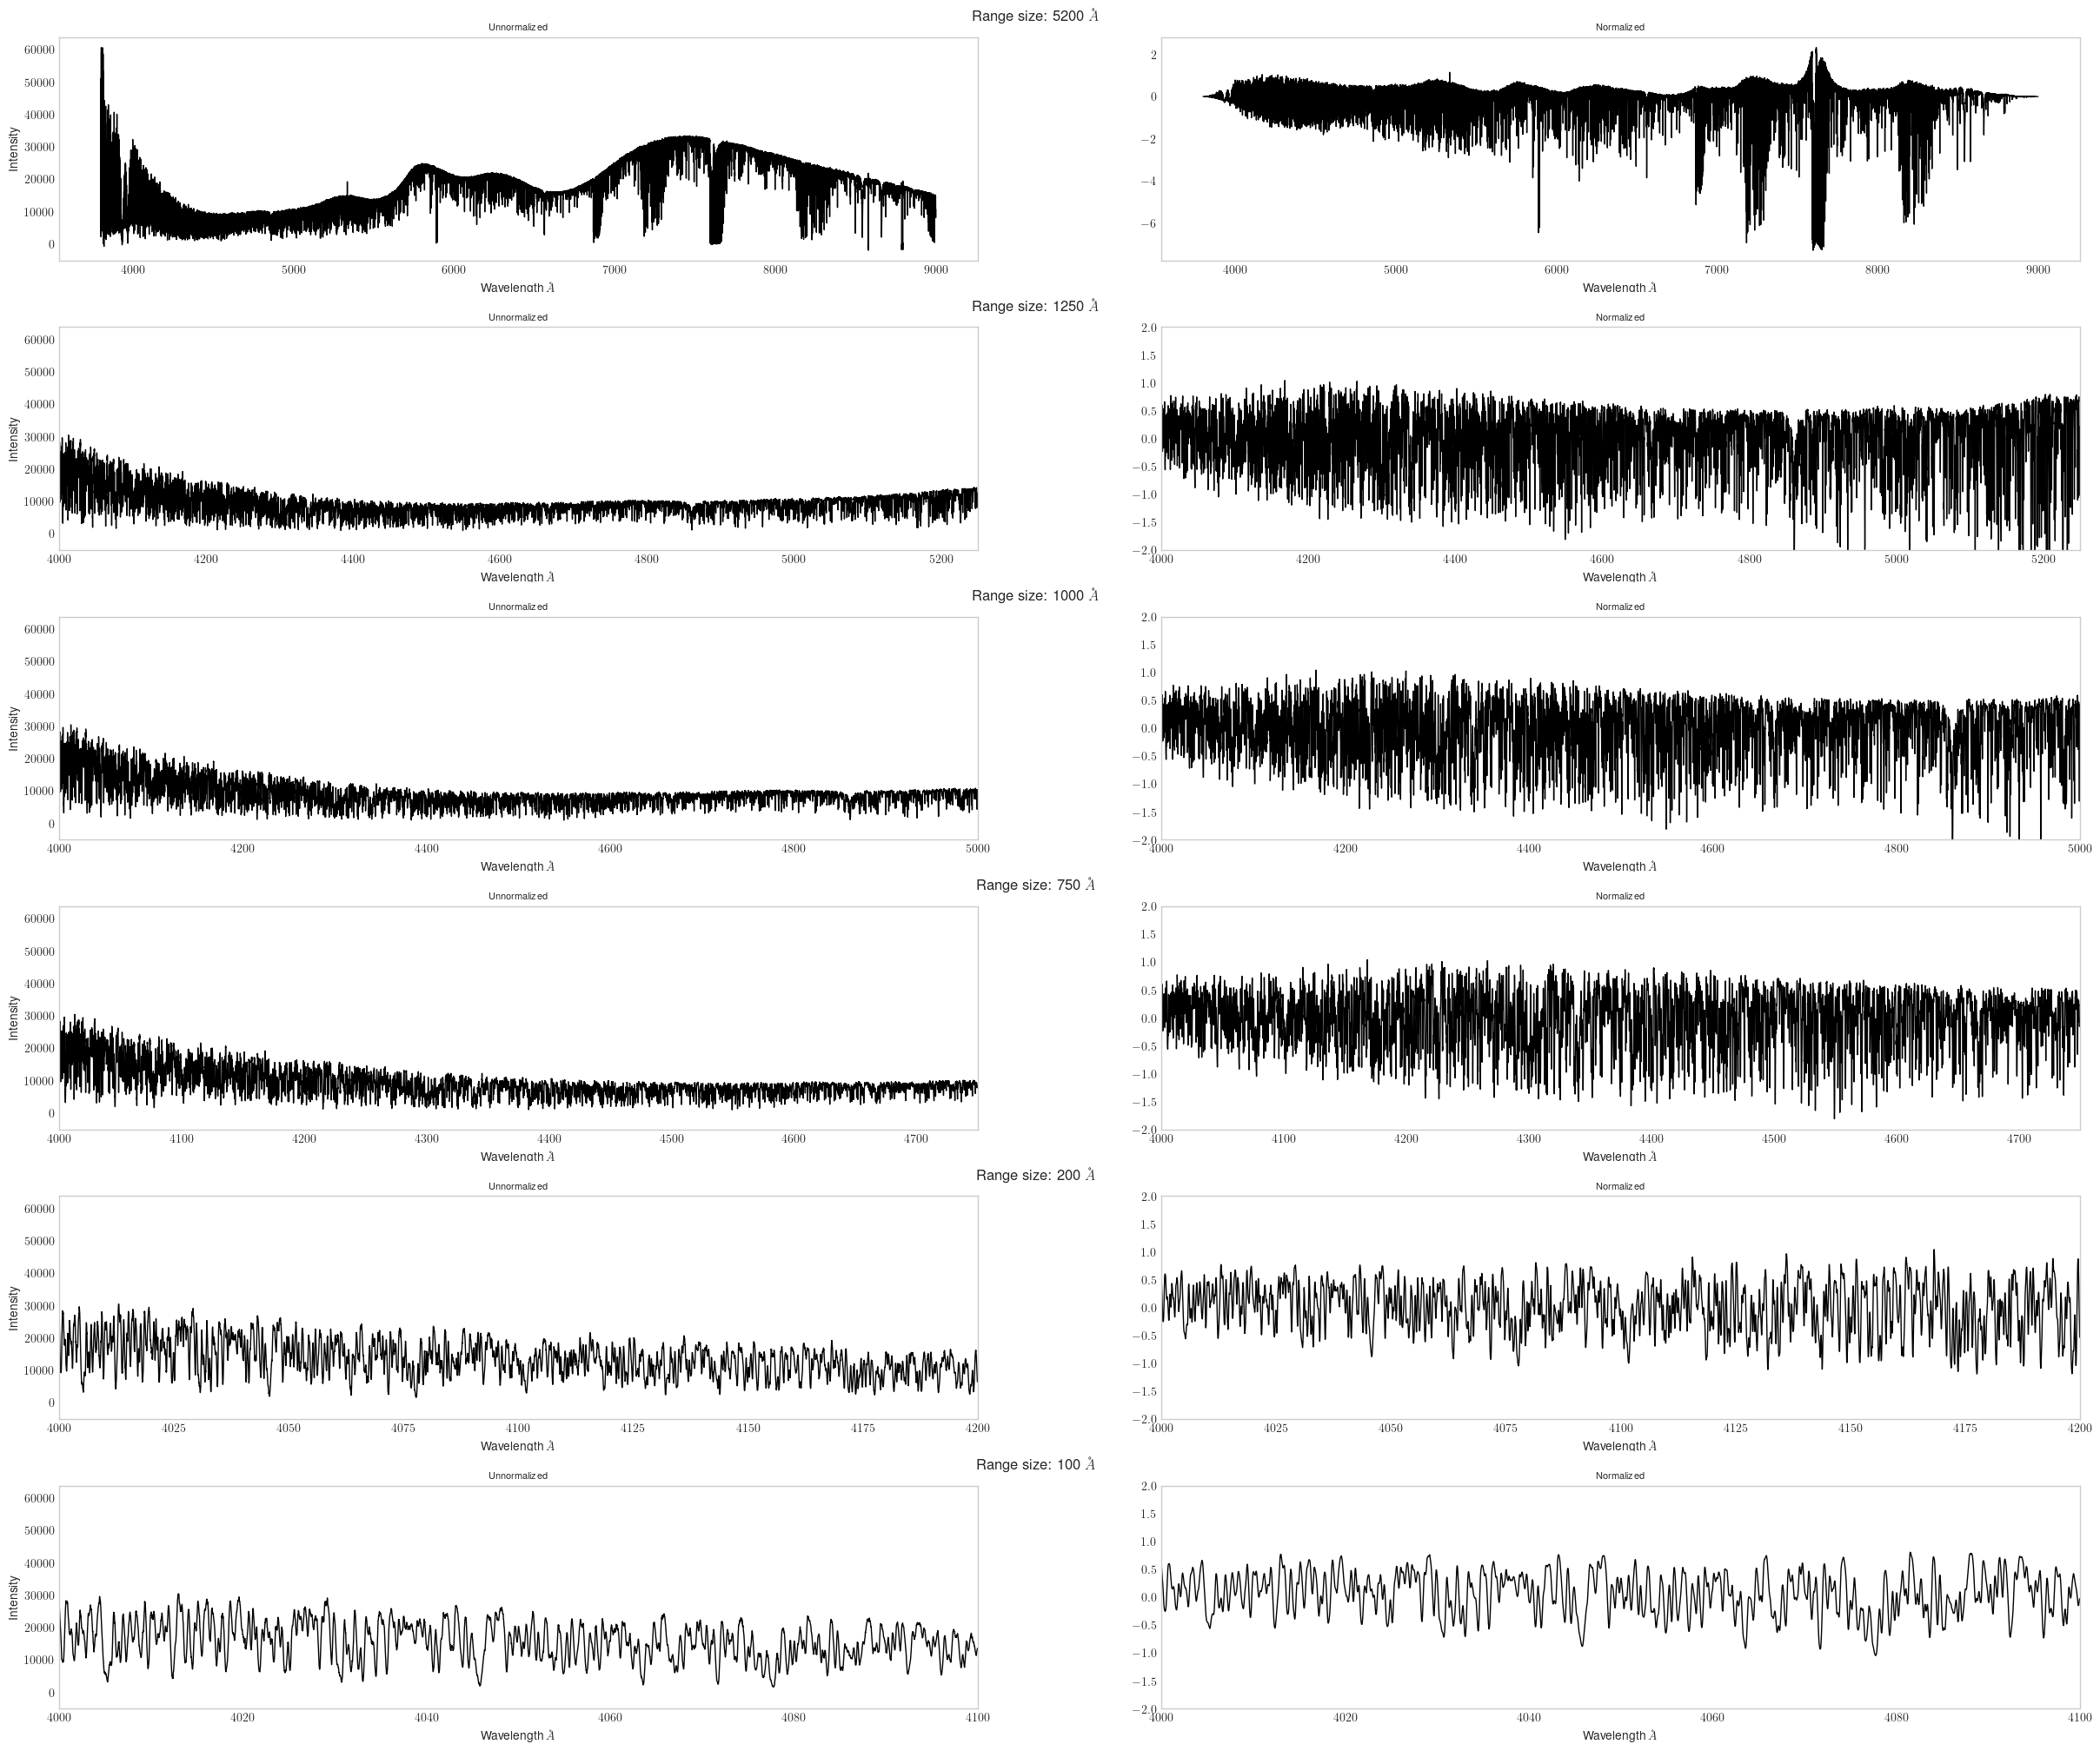

In [74]:
# Print the first spectrum
range_size = [5200,1250,1000,750,200,100]
plt.style.use('sparta')
fig = plt.figure(constrained_layout=False, figsize=(30, 20))
fig.suptitle(r'$\delta$ Cephei - 2011.09.11', fontsize='x-large')

subfigs = fig.subfigures(6, 1)

for outerind, subfig in enumerate(subfigs.flat):
    axs = subfig.subplots(1,2,sharex=True,sharey = False)
    subfig.suptitle(r'Range size: ' + str(range_size[outerind]) + r' $\AA$', fontsize='large')
    for innerind, ax in enumerate(axs.flat):
        if outerind == 1:
            ax.set_xlim(4000, 5250)
        elif outerind == 2:
            ax.set_xlim(4000,5000)
        elif outerind == 3:
            ax.set_xlim(4000,4750)
        elif outerind == 4:
            ax.set_xlim(4000,4200)
        elif outerind == 5:
            ax.set_xlim(4000,4100)
        if innerind%2 == 0:
            ax.plot(obs_data.time_series.vals[0].wv[0], obs_data.time_series.vals[0].sp[0], lw=1, color='k')
            ax.set_title(r'Unnormalized',fontsize=8)
            ax.set_ylabel('Intensity')
        else:
            ax.plot(obs_data2.time_series.vals[0].wv[0], obs_data2.time_series.vals[0].sp[0], lw=1, color='k')
            ax.set_title(r'Normalized',fontsize=8)
            if outerind != 0:
                ax.set_ylim(-2,2)
        ax.set_xlabel(r'Wavelength $\AA$')
# plt.savefig('delCep_spectra.png',dpi=450)
plt.show()